In [1]:
# Importing the libraries and functions
from functions import *

## 1. Data Preparation

We have defined a function that parses an XML file with the BLAST alignment into a pandas dataframe. This function can be utilized to include any additional columns from the BLAST results.

In [2]:
# Keep only disordered regions in the initial dataframe filtering using curated_disordered dataframe
disordered = pd.read_csv("disordered_df.csv")
print(f"The number of rows containing disordered regions: {len(disordered)}")
disordered.head(5)

The number of rows containing disordered regions: 2887


,query_id,subject_id,query_len,hsp_len,query_seq,match_seq,subject_seq,query_start,query_end,subject_start,subject_end,identity,positive,gaps,eval,bit_score,count
0,Q9H832,A0A6J2FM24,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGAAGPGAS V GVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGAAGPGASGVTGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
1,Q9H832,A0A3Q7W6Y2,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGA GPGAS VAGVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGATGPGASGVAGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
2,Q9H832,A0A2U3VK69,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGAAGPGAS V GVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGAAGPGASGVTGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
3,Q9H832,A0A2Y9JVH5,354,358,MAESPTEEAATA----GAGAAGPGASSVAGVVGVSGSGGGFGPPFL...,MAESPTEEAATA GAGAAGPGAS VAGVVGVSGSG FGPPFL...,MAESPTEEAATATATAGAGAAGPGASGVAGVVGVSGSG--FGPPFL...,1,354,1,356,351,351,6,0.0,1854.0,200
4,Q9H832,A0A8C7ALE4,354,358,MAESPTEEAATA----GAGAAGPGASSVAGVVGVSGSGGGFGPPFL...,MAESPTEEAATA GAGAAGPGAS VAGVVGVSGSG FGPPFL...,MAESPTEEAATATATAGAGAAGPGASGVAGVVGVSGSG--FGPPFL...,1,354,1,356,351,351,6,0.0,1854.0,200


The number of sequences containing disordered regions: 16


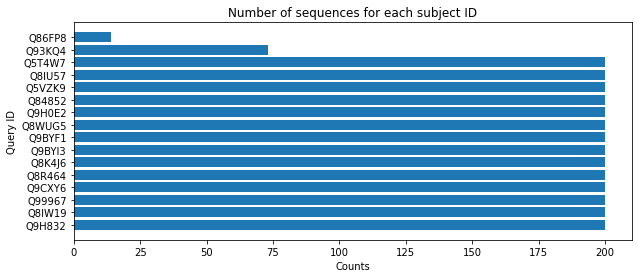

In [3]:
# Plot subject IDs count
figure(figsize=(10, 4))
plt.barh(disordered['query_id'], disordered['count'])
plt.xlabel('Counts')
plt.ylabel('Query ID')
plt.title('Number of sequences for each subject ID')
print(f"The number of sequences containing disordered regions: {disordered['query_id'].nunique()}")
plt.show()

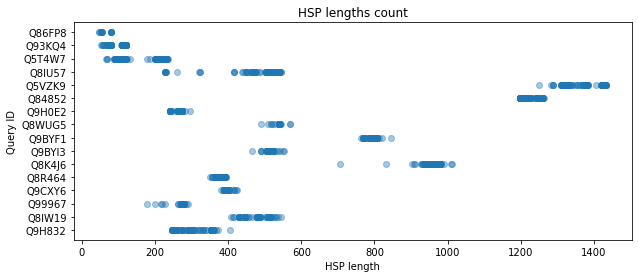

In [4]:
# Plot HSP length count
figure(figsize=(10, 4))
plt.scatter(disordered['hsp_len'], disordered['query_id'], alpha=0.4)
plt.xlabel('HSP length')
plt.ylabel('Query ID')
plt.title('HSP lengths count')
plt.show()

In [5]:
# Check if there are disordered regions for a particular query ID
%store -r id_dis
# id = id_dis
id = 'Q8R464'
selected_dis = disordered[disordered["query_id"].isin([id])]

# Filter the curated_disprot dataframe based on selected ID
curated_disprot = pd.read_csv("curated_disprot.csv")
curated_query = curated_disprot[curated_disprot['acc'] == id]
curated_query

,acc,evidence,feature,source,start,end,length
2206,Q8R464,curated,disorder,disprot,25,120,96


### 2. Query ID Analysis

Next, we determine the count of subject IDs for each query ID. It's important to note that we need to summarize the data for all subject IDs that occurred for a particular query, rather than for each individual 'query-sequence' pair.

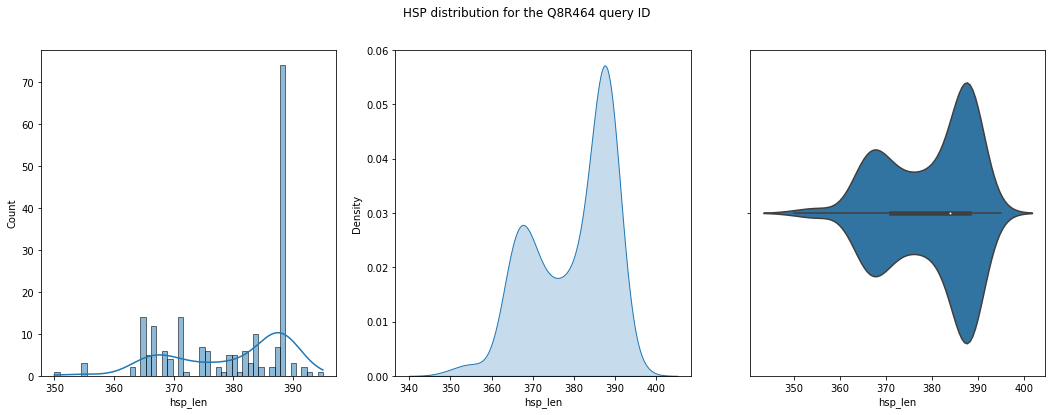

In [6]:
# Create bar plot for HSP hits of selected query ID
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(selected_dis['hsp_len'], kde = True, bins = 50, ax = ax1)
sns.kdeplot(selected_dis['hsp_len'], shade = True, ax = ax2)
sns.violinplot(x = selected_dis['hsp_len'], ax = ax3)
plt.suptitle(f'HSP distribution for the {id} query ID')
plt.show()

The `histplot` shows the distribution of HSP lengths in the selected query ID by grouping the HSP lengths into bins or ranges along the x-axis and displaying the frequency of HSP lengths as the height of the corresponding bar on the y-axis.

The height of the `kdeplot` curve represents the estimated probability density of the variable being plotted at each point on the x-axis. For example, in the case of the HSP length, the height of the curve at a particular value of x represents the estimated density of observations around that value. The area under the curve represents the total probability of all possible values of the variable, which is equal to 1.

The `violinplot` provides the information about the interquartile range (thick gray line), median that is represented by a white dot and the rest of a distribution (thin gray line). The distribution's shape is presented on either side of the gray line through kernel density estimation. The wider sections of the violin plot represent a greater probability of the population taking on a specific value, while the narrower sections indicate a lower probability.

## 3. Multiple Sequence Alignment

Within this framework, we will compare the MSA results obtained directly from the BLAST output with those generated from the ClustalOmega service.

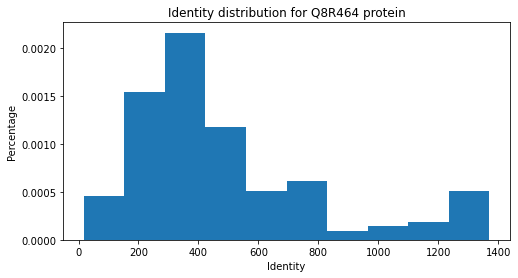

In [7]:
# Plot identity distribution
figure(figsize=(8, 4))
plt.hist(disordered['identity'], bins=10, density=True)  # Set density=True for percentage values
plt.xlabel('Identity')
plt.ylabel('Percentage')
plt.title(f'Identity distribution for {id} protein')
plt.show()

In [8]:
# Import numpy arrays of MSAs from BLAST, ClustalOmega and MAFFT
%store -r blast_seqs clustal_seqs mafft_seqs
# The number of sequences may differ
blast_seqs.shape, clustal_seqs.shape, mafft_seqs.shape

((201, 354), (199, 354), (199, 354))

### Removing redundant regions

For this step we use the input files for ClustalOmega or MAFFT alignment. The goal is to keep only non-redundant regions. We set the threshold for redundancy of 62%. The program implementing the task is called `cd-hit`.

Next, we will be working with the newly generated file. It will be uploaded to ebi website, where we will select Pearson/FASTA as the output format. Once we have downloaded the aligned sequences, we can analyze the alignment using Jalview.

In [9]:
# Create a dataframe with the calculated redundancy
redundancy_df = pd.read_csv("nr_75.csv", sep=";")
redundancy_df

,id,len,non-red,ratio
0,Q9H832,199,2,"0,01"
1,Q8IW19,200,3,"0,02"
2,Q99967,198,3,"0,02"
3,Q9CXY6,200,1,"0,01"
4,Q8R464,200,2,"0,01"
5,Q8K4J6,198,1,"0,01"
6,Q9BYI3,198,3,"0,02"
7,Q9BYF1,199,2,"0,01"
8,Q8WUG5,199,3,"0,02"
9,Q9H0E2,200,1,"0,01"


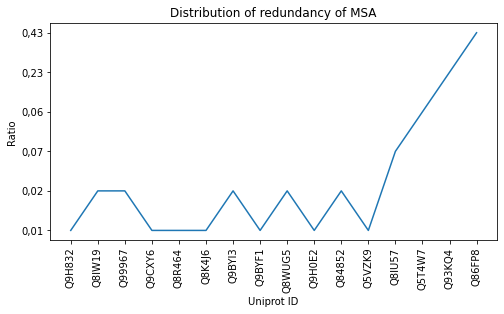

In [10]:
# Plot the redundancy distribution
figure(figsize=(8, 4))
plt.plot(redundancy_df['id'], redundancy_df['ratio'])
plt.xlabel("Uniprot ID")
plt.ylabel("Ratio")
plt.xticks(rotation='vertical')
plt.title("Distribution of redundancy of MSA")
plt.show()

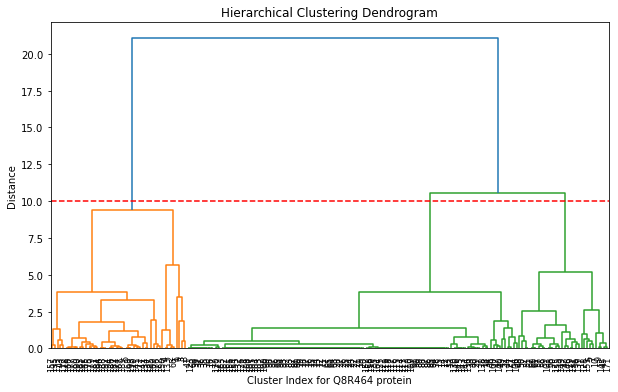

In [11]:
# Plot the dendrogram
%store -r data_file

cluster_data = []
with open(data_file, 'r') as file:
    for line in file:
        if line.startswith('>Cluster'):
            continue
        parts = line.strip().split('\t')
        percentage_matches = re.findall(r'\d+\.\d+', parts[-1])
        if percentage_matches:
            percentage = float(percentage_matches[0])
            cluster_data.append(percentage)

# Convert the data into a matrix
matrix_data = np.array(cluster_data).reshape(len(cluster_data), 1)

# Create linkage matrix using the data and hierarchical clustering
Z = linkage(matrix_data, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=np.arange(len(cluster_data)), leaf_rotation=90, leaf_font_size=8)

# Add a horizontal line for the threshold
threshold = 10.0
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold}%)')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel(f'Cluster Index for {id} protein')
plt.ylabel('Distance')
plt.show()

## 4. Analysing the quality of prediction

For calculation of the entropy we use a probability distribution with 20 outcomes, where each outcome has an equal probability of 1/20. Entropy is a measure of the uncertainty or randomness associated with a probability distribution. In this case, since the probability distribution is uniform, the entropy is maximized, meaning that there is maximum uncertainty or randomness associated with the outcomes.

With occupancy we define the proportion of non-missing (non-gap) values in the column.

### 4.1. Calculation of occupancy and entropy for initial MSA (redundant and non-redundant)

In [12]:
# Obtain the occupancy and entropy statistics for each type of MSA
%store -r nr_seqs
nr_calc = stats_calculation(nr_seqs) # non-redundant MSA CLustalOmega
blast_calc = stats_calculation(blast_seqs) # initial MSA BLAST
clustal_calc = stats_calculation(clustal_seqs) # initial MSA ClustalOmega
mafft_calc = stats_calculation(mafft_seqs) # initial MSA MAFFT

In [13]:
length_cl = len(clustal_seqs)
length_nr = len(nr_seqs)
print(id, length_nr, )
nr_seqs

Q8R464 3


array([['M', 'A', 'E', ..., 'L', 'R', 'V'],
       ['M', 'A', 'E', ..., 'L', 'R', 'V'],
       ['M', 'A', 'E', ..., 'S', 'H', 'S']], dtype='<U1')

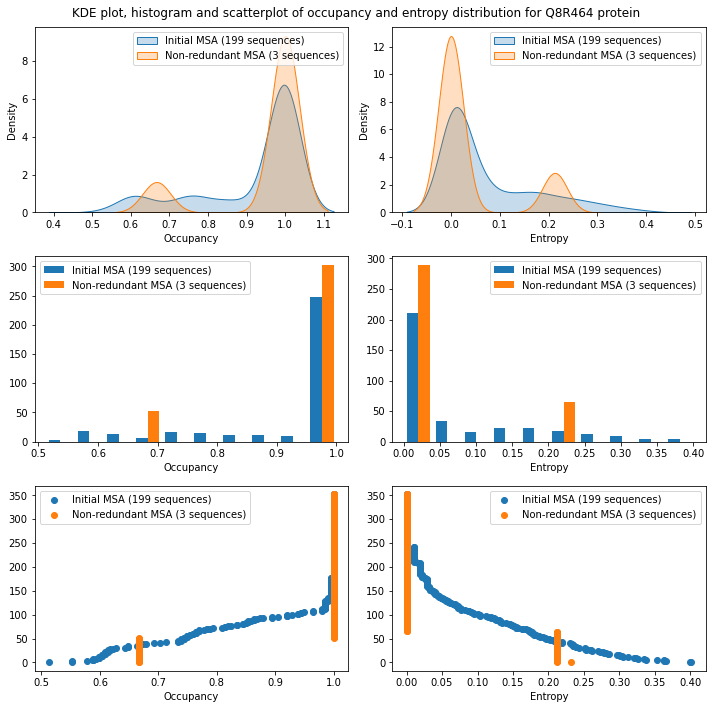

In [14]:
# KDE plot of occupancy/entropy redundant vs non-redundant
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

sns.kdeplot(clustal_calc['occupancy'], shade = True, ax = ax[0,0])
sns.kdeplot(nr_calc['occupancy'], shade = True, ax = ax[0,0])

sns.kdeplot(clustal_calc['entropy'], shade = True, ax = ax[0,1])
sns.kdeplot(nr_calc['entropy'], shade = True, ax = ax[0,1])

# Histogram of occupancy/entropy redundant vs non-redundant
ax[1,0].hist([clustal_calc['occupancy'], nr_calc['occupancy']])
ax[1,1].hist([clustal_calc['entropy'], nr_calc['entropy']])

# Scatterplot of occupancy/entropy redundant vs non-redundant
ax[2,0].scatter(np.sort(clustal_calc['occupancy']), clustal_calc['pos'])
ax[2,0].scatter(np.sort(nr_calc['occupancy']), nr_calc['pos'])

ax[2,1].scatter(np.sort(clustal_calc['entropy']), clustal_calc['pos'][::-1])
ax[2,1].scatter(np.sort(nr_calc['entropy']), nr_calc['pos'][::-1])

# Add x-axis labels to all subplots
x_axis_labels = ['Occupancy', 'Entropy']
for i in range(3):
    for j in range(2):
        ax[i, j].set_xlabel(x_axis_labels[j])

# Add the common legend (assuming you have already done this)
legend_labels = [f'Initial MSA ({length_cl} sequences)', f'Non-redundant MSA ({length_nr} sequences)']
for ax in ax.flat:
    ax.legend(legend_labels)

plt.suptitle(f'KDE plot, histogram and scatterplot of occupancy and entropy distribution for {id} protein')
plt.tight_layout()
plt.show()

### 4.2. Calculation of occupancy and entropy for disordered regions of MSA

#### 4.2.1 Occupancy and entropy for several disordered regions in initial MSA

In [15]:
# Calculate occupancy and entropy for the 1st disordered region
%store -r dis_calc0 dis_calc1
%store -r dis_calc_nr0 dis_calc_nr1
# dis_calc0.head()

In [16]:
# # Calculate occupancy and entropy for the 2nd disordered region
# dis_calc1.head()

In [17]:
def plot_disordered_regions(id, l_cl, l_nr, dis_calc_num):
    # Define the data frame names
    dis_calc_name = f"dis_calc{dis_calc_num}"
    dis_calc_nr_name = f"dis_calc_nr{dis_calc_num}"

    # Define the figure and axes
    fig, ax = plt.subplots(3, 2, figsize=(10, 10))

    # KDE plot of occupancy/entropy of disordered region
    sns.kdeplot(eval(dis_calc_name)['occupancy'], shade=True, ax=ax[0, 0], warn_singular=False)
    sns.kdeplot(eval(dis_calc_nr_name)['occupancy'], shade=True, ax=ax[0, 0], warn_singular=False)
    sns.kdeplot(eval(dis_calc_name)['entropy'], shade=True, ax=ax[0, 1], warn_singular=False)
    sns.kdeplot(eval(dis_calc_nr_name)['entropy'], shade=True, ax=ax[0, 1], warn_singular=False)

    # Histogram of occupancy/entropy redundant vs non-redundant
    ax[1, 0].hist([eval(dis_calc_name)['occupancy'], eval(dis_calc_nr_name)['occupancy']])
    ax[1, 1].hist([eval(dis_calc_name)['entropy'], eval(dis_calc_nr_name)['entropy']])

    # Scatterplot of occupancy/entropy redundant vs non-redundant
    ax[2, 0].scatter(np.sort(eval(dis_calc_name)['occupancy']), eval(dis_calc_name)['pos'])
    ax[2, 0].scatter(np.sort(eval(dis_calc_nr_name)['occupancy']), eval(dis_calc_nr_name)['pos'])

    ax[2, 1].scatter(np.sort(eval(dis_calc_name)['entropy']), eval(dis_calc_name)['pos'][::-1])
    ax[2, 1].scatter(np.sort(eval(dis_calc_nr_name)['entropy']), eval(dis_calc_nr_name)['pos'][::-1])

    # Add x-axis labels
    x_axis_labels = ['Occupancy', 'Entropy']
    for i in range(3):
        for j in range(2):
            ax[i, j].set_xlabel(x_axis_labels[j])

    # Add the legend
    legend_labels = [f'Initial MSA ({l_cl} sequences)', f'Non-redundant MSA ({l_nr} sequences)']
    for ax in ax.flat:
        ax.legend(legend_labels)

    plt.suptitle(f'KDE plot, histogram, and scatterplot of occupancy and entropy distribution for {id}_{dis_calc_num+1} protein')
    plt.tight_layout()
    plt.show()


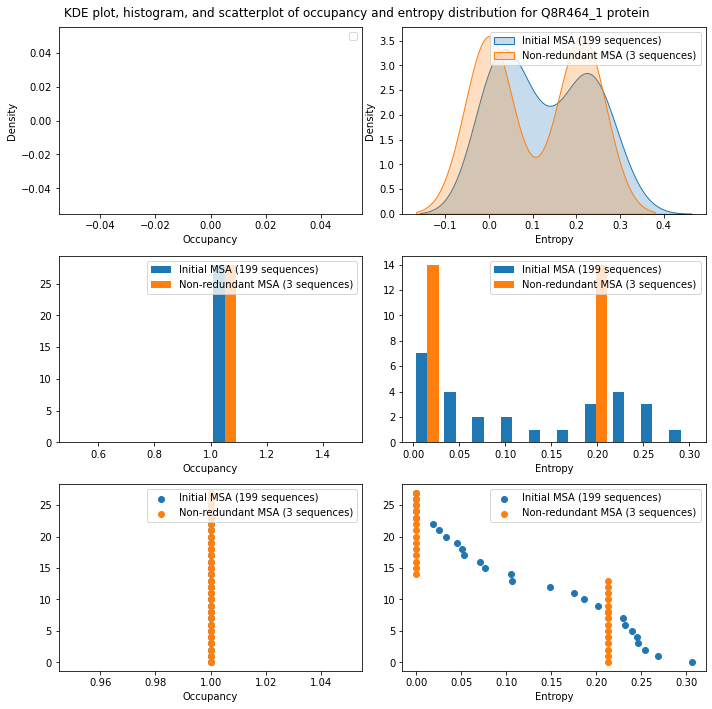

In [18]:
# Plot the statistics for the 1st disordered region
plot_disordered_regions(id, length_cl, length_nr, 0)

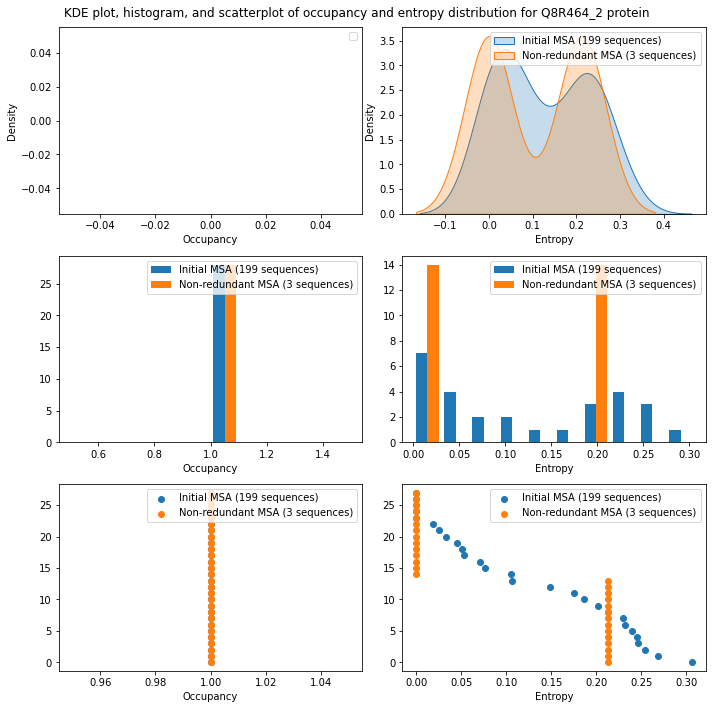

In [19]:
# Plot the statistics for the 2nd disordered region
plot_disordered_regions(id, length_cl, length_nr, 1)

#### 4.2.2 Occupancy and entropy for one disordered region in initial MSA

In [20]:
# # Calculate occupancy and entropy for the region
%store -r dis_calc
%store -r dis_calc_nr
# dis_calc

/Users/alina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/alina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


NameError: name 'length' is not defined

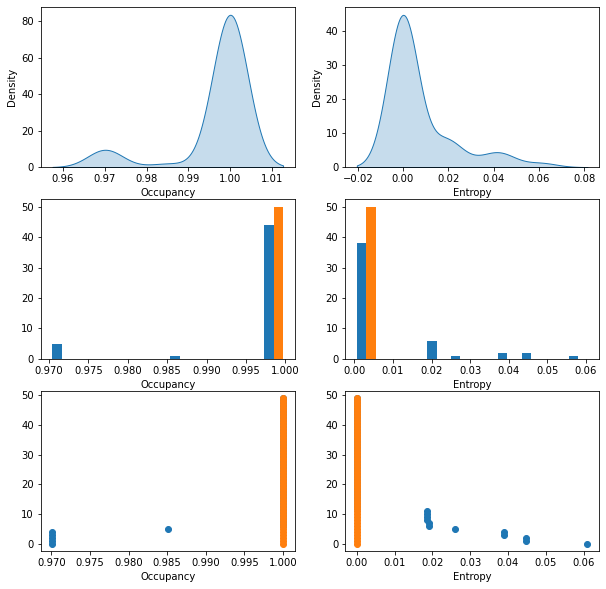

In [21]:
# KDE plot of occupancy/entropy of 1 disordered region
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

sns.kdeplot(dis_calc['occupancy'], shade = True, ax = ax[0,0])
sns.kdeplot(dis_calc_nr['occupancy'], shade = True, ax = ax[0,0])
sns.kdeplot(dis_calc['entropy'], shade = True, ax = ax[0,1])
sns.kdeplot(dis_calc_nr['entropy'], shade = True, ax = ax[0,1])

# Histogram of occupancy/entropy redundant vs non-redundant
ax[1,0].hist([dis_calc['occupancy'], dis_calc_nr['occupancy']])
ax[1,1].hist([dis_calc['entropy'], dis_calc_nr['entropy']])

# Scatterplot of occupancy/entropy redundant vs non-redundant
ax[2,0].scatter(np.sort(dis_calc['occupancy']), dis_calc['pos'])
ax[2,0].scatter(np.sort(dis_calc_nr['occupancy']), dis_calc_nr['pos'])

ax[2,1].scatter(np.sort(dis_calc['entropy']), dis_calc['pos'][::-1])
ax[2,1].scatter(np.sort(dis_calc_nr['entropy']), dis_calc_nr['pos'][::-1])

# Add x-axis labels
x_axis_labels = ['Occupancy', 'Entropy']
for i in range(3):
    for j in range(2):
        ax[i, j].set_xlabel(x_axis_labels[j])

# Add the legend
legend_labels = ['Initial MSA', f'Non-redundant MSA ({length} sequences)']
for ax in ax.flat:
    ax.legend(legend_labels)

plt.suptitle(f'KDE plot, histogram and scatterplot of occupancy and entropy distribution for {id} protein')
plt.tight_layout()
plt.show()